## Name : Fergal Keane

## Student # : 21211167

### Import Python Modules and Dataset

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn import manifold #needed for multidimensional scaling (MDS) and t-SNE
from sklearn import cluster #needed for k-Means clustering
from sklearn import preprocessing #needed for scaling attributes to the nterval [0,1]
from sklearn.metrics import silhouette_samples, silhouette_score

##### Load the dataset

In [2]:
df = pd.read_csv("./loans_train_prepared-1.csv")
data = np.array(df.values, dtype=float)
print('(number of examples, number of attributes): ', data.shape)

(number of examples, number of attributes):  (614, 16)


In [27]:
df.head()

Dependents  ApplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0    0.000000         1.084523    1.058140              0.75               1   
1    0.333333         0.925883    1.047319              0.75               1   
2    0.000000         0.683858    0.635920              0.75               1   
3    0.000000         0.608992    1.002824              0.75               1   
4    0.000000         1.101869    1.115650              0.75               1   

   Gender_Male  Gender_nan  Married_Yes  Married_nan  Self_Employed_Yes  \
0            1           0            0            0                  0   
1            1           0            1            0                  0   
2            1           0            1            0                  1   
3            1           0            1            0                  0   
4            1           0            0            0                  0   

   Self_Employed_nan  Education_Not Graduate  Property_Area_Semiurban  \
0                  0                       0                        0   
1                  0                       0                        0   
2                  0                       0                        0   
3                  0                       1                        0   
4                  0                       0                        0   

   Property_Area_Urban  Loan_Status_Y  TotalIncome  
0                    1              1     0.841086  
1                    0              0     0.871711  
2                    1              1     0.385189  
3                    1              1     0.717012  
4                    1              1     0.860305

In [3]:
df.describe()

Dependents  ApplicantIncome  LoanAmount  Loan_Amount_Term  \
count  614.000000       614.000000  614.000000        614.000000   
mean     0.248100         0.916588    1.076222          0.713355   
std      0.336541         0.412366    0.338744          0.134226   
min      0.000000         0.004634    0.005026          0.025000   
25%      0.000000         0.662440    0.883668          0.750000   
50%      0.000000         0.815365    1.047319          0.750000   
75%      0.333333         1.078246    1.229571          0.750000   
max      1.000000         3.357480    2.461145          1.000000   

       Credit_History  Gender_Male  Gender_nan  Married_Yes  Married_nan  \
count      614.000000   614.000000  614.000000   614.000000   614.000000   
mean         0.855049     0.796417    0.021173     0.648208     0.004886   
std          0.352339     0.402991    0.144077     0.477919     0.069786   
min          0.000000     0.000000    0.000000     0.000000     0.000000   
25%          1.000000     1.000000    0.000000     0.000000     0.000000   
50%          1.000000     1.000000    0.000000     1.000000     0.000000   
75%          1.000000     1.000000    0.000000     1.000000     0.000000   
max          1.000000     1.000000    1.000000     1.000000     1.000000   

       Self_Employed_Yes  Self_Employed_nan  Education_Not Graduate  \
count         614.000000         614.000000              614.000000   
mean            0.133550           0.052117                0.218241   
std             0.340446           0.222445                0.413389   
min             0.000000           0.000000                0.000000   
25%             0.000000           0.000000                0.000000   
50%             0.000000           0.000000                0.000000   
75%             0.000000           0.000000                0.000000   
max             1.000000           1.000000                1.000000   

       Property_Area_Semiurban  Property_Area_Urban  Loan_Status_Y  \
count               614.000000           614.000000     614.000000   
mean                  0.379479             0.328990       0.687296   
std                   0.485653             0.470229       0.463973   
min                   0.000000             0.000000       0.000000   
25%                   0.000000             0.000000       0.000000   
50%                   0.000000             0.000000       1.000000   
75%                   1.000000             1.000000       1.000000   
max                   1.000000             1.000000       1.000000   

       TotalIncome  
count   614.000000  
mean      0.862686  
std       0.428068  
min       0.005599  
25%       0.597383  
50%       0.783902  
75%       1.035796  
max       3.207353

#### Can we assume that this prepared data doesn't need to be scaled?

### Scatterplot Function (to be used below for visualising a clustering)

The function `clustering_scatterplot()` creates the 2D scatter plot of the clustered dataset.

In [4]:
colors = np.array(['orange', 'blue', 'lime', 'blue', 'khaki', 'pink', 'green', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot


def clustering_scatterplot(points, labels, centers, title):
    
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

### K-Means Clustering

Number of clusters $k$ will be selected after looking for an elbow..

#### Run k-Means

_See https://scikit-learn.org/stable/modules/clustering.html for alternative clustering methods._

In [69]:
max_k = 12
result = []
for k_val in range(2,max_k):
    clustered_data_sklearn = cluster.KMeans(n_clusters=k_val, n_init=10, max_iter=300).fit(data)
    result.append([k_val, clustered_data_sklearn.inertia_])
df_results = pd.DataFrame(result)

In [70]:
df_results

0            1
0   2  1127.618011
1   3  1005.893486
2   4   919.634466
3   5   846.687298
4   6   794.479228
5   7   751.294382
6   8   722.032733
7   9   703.818231
8  10   676.642592
9  11   660.157185

In [71]:
for idx in range(0, len(df_results)-1):
    percent = (df_results[1][idx]-df_results[1][idx+1])/df_results[1][idx]
    print(f'index = {idx}, clusters = {df_results[0][idx]}, percentage change = {percent}')

index = 0, clusters = 2, percentage change = 0.10794836904200966
index = 1, clusters = 3, percentage change = 0.08575363215557934
index = 2, clusters = 4, percentage change = 0.07932191671092709
index = 3, clusters = 5, percentage change = 0.06166157205661333
index = 4, clusters = 6, percentage change = 0.0543561677665056
index = 5, clusters = 7, percentage change = 0.038948313428572065
index = 6, clusters = 8, percentage change = 0.025226698220699197
index = 7, clusters = 9, percentage change = 0.038611729493580896
index = 8, clusters = 10, percentage change = 0.024363536152848423


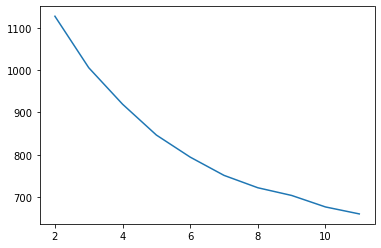

In [72]:
plt.plot(df_results.iloc[:, 0], df_results.iloc[:, 1])

In [73]:
k=8
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(data)

For n_clusters = 2 The average silhouette_score is : 0.15345667241994657
For n_clusters = 3 The average silhouette_score is : 0.15551634932637773
For n_clusters = 4 The average silhouette_score is : 0.15520273853358454
For n_clusters = 5 The average silhouette_score is : 0.15280146031525246
For n_clusters = 6 The average silhouette_score is : 0.16361248389941493
For n_clusters = 7 The average silhouette_score is : 0.1534240512863035
For n_clusters = 8 The average silhouette_score is : 0.16004729360482056
For n_clusters = 9 The average silhouette_score is : 0.17376269041860654
For n_clusters = 10 The average silhouette_score is : 0.1651363933677359


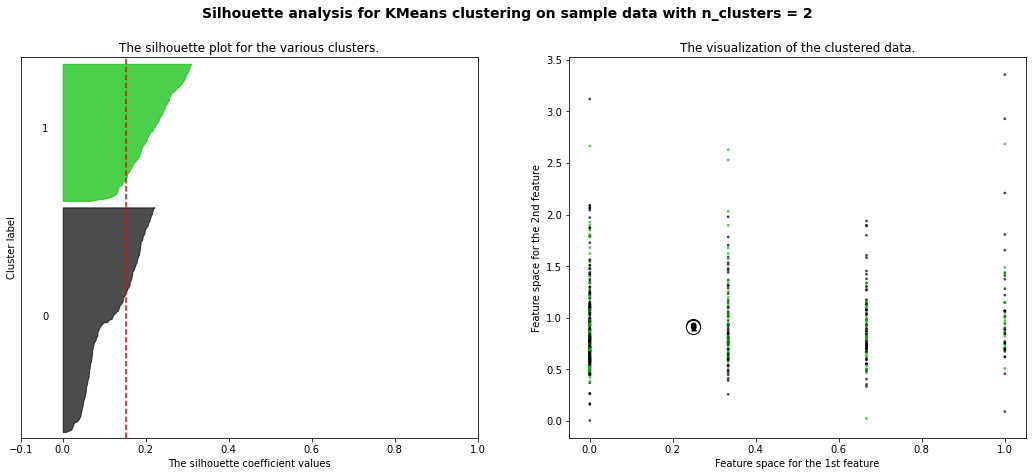

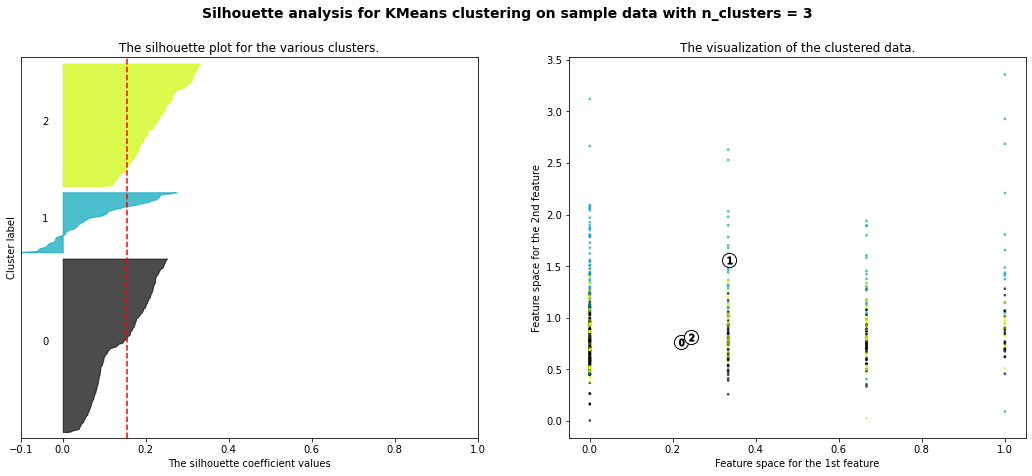

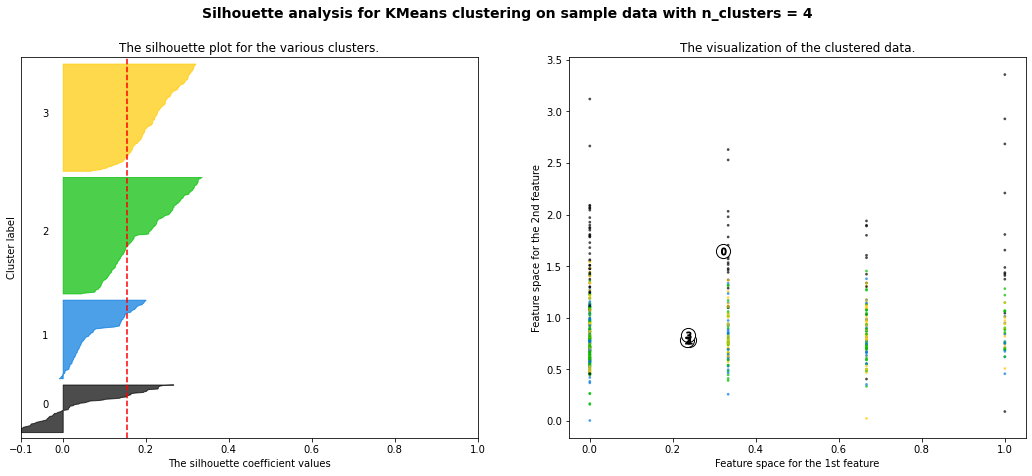

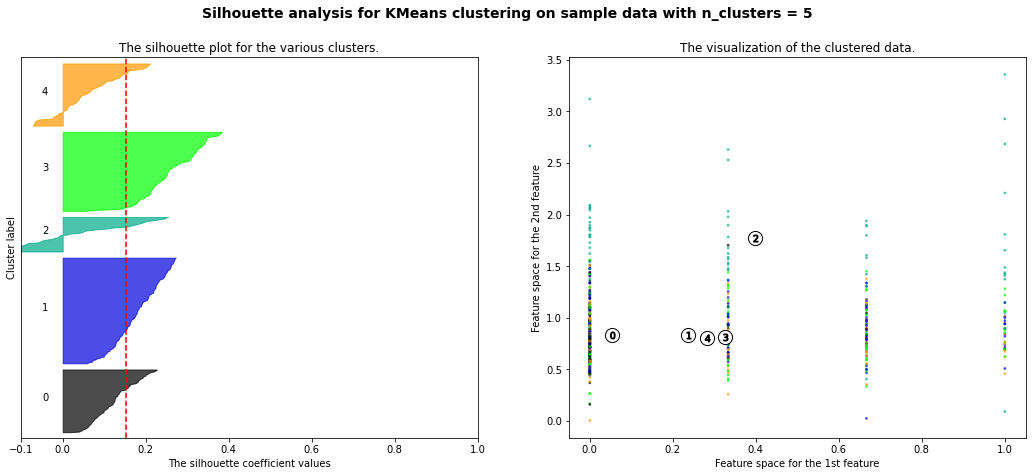

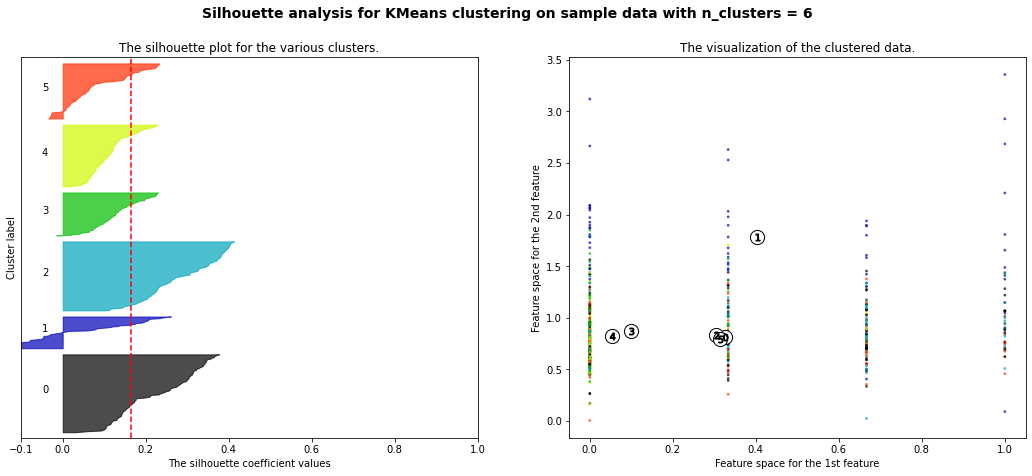

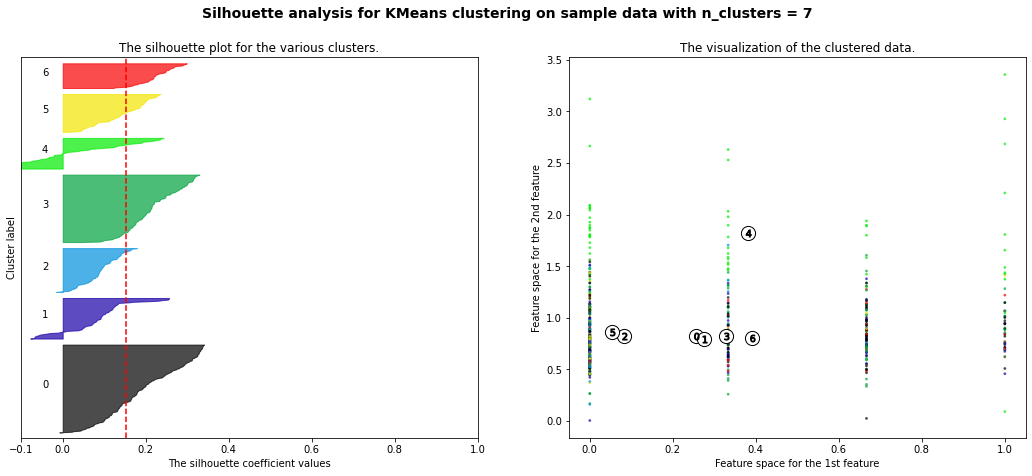

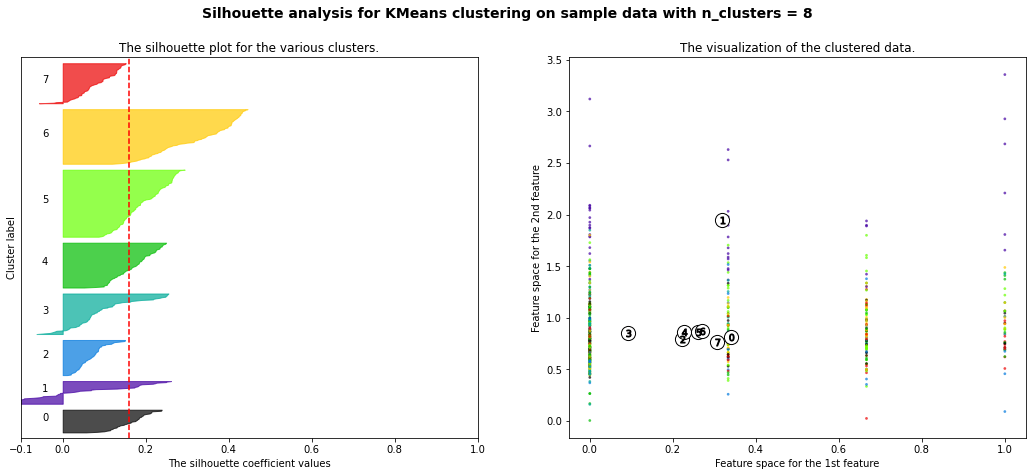

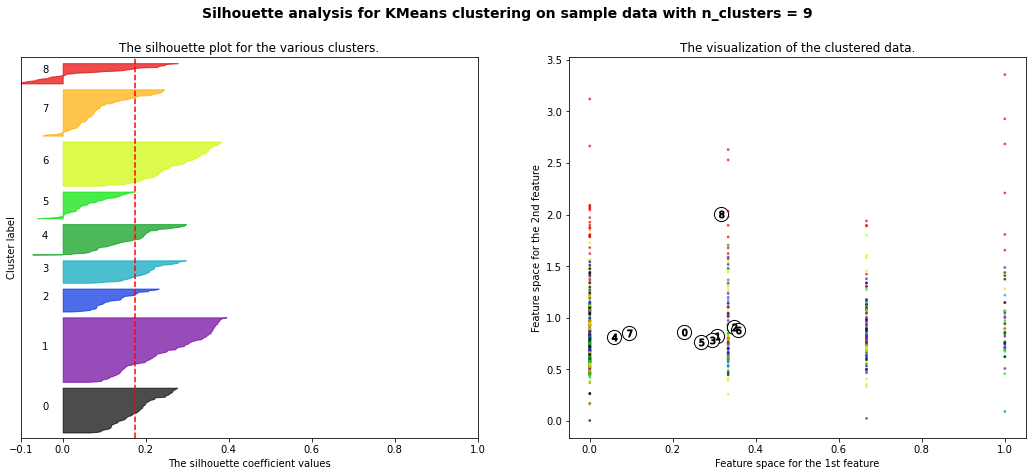

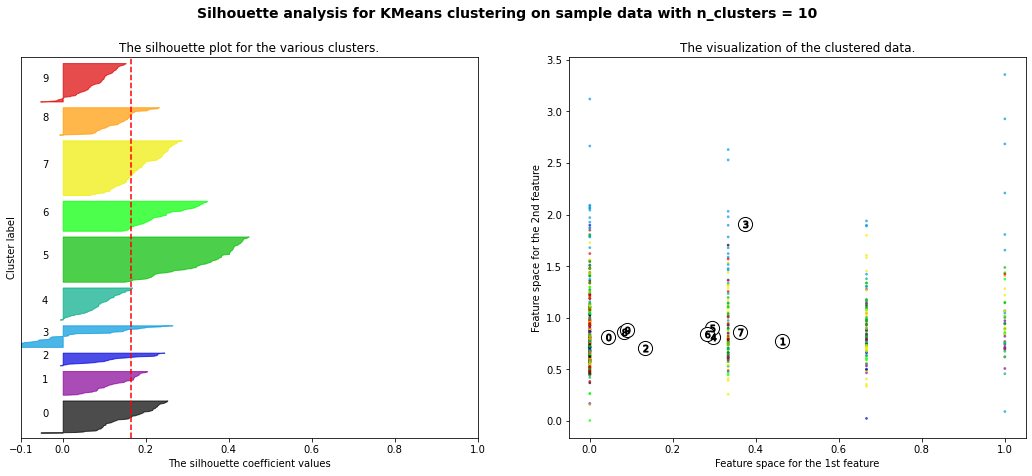

In [74]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = cluster.KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        data[:, 0], data[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

## Apply a manifold-learning technique to project the data set to a 2D space
https://scikit-learn.org/stable/modules/manifold.html


Append the cluster centers to the dataset.

In [17]:
data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]

In [23]:
data_and_centers.shape

(621, 16)

In [26]:
temp_df = pd.DataFrame(data_and_centers)
temp_df.to_csv('data_and_centers.csv')

#### Apply multi-dimensional scaling (MDS) to project both the data and the k-Means cluster centers to a 2D space

Project both the data and the k-Means cluster centers to 2D.

In [108]:
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


Plot the transformed examples and the centers. Use the cluster assignment to colour the examples.

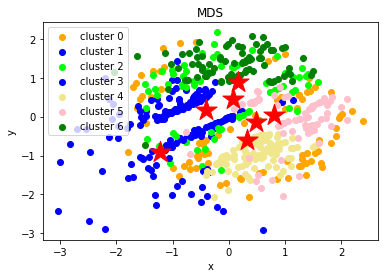

In [109]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

#### Apply t-SNE to project both the data and the k-Means cluster centers to a 2D space

Project both the data and the k-Means cluster centers to 2D.

In [110]:
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


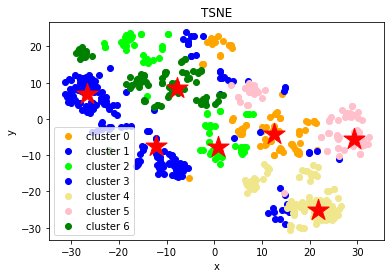

In [111]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')

In [103]:
print(k)
#print(shape(XYcoordinates))
print(XYcoordinates)
print(XYcoordinates[-7:])
print(XYcoordinates[-k:,:])

5
[[ -8.55713    22.145063 ]
 [ -6.4809656  -3.4848704]
 [-18.974442   19.948824 ]
 ...
 [  7.2403994 -22.850153 ]
 [ 24.578356   -3.4031496]
 [-21.776611   19.804382 ]]
[[-21.054806   26.274734 ]
 [ 10.104339  -15.404865 ]
 [-10.505427    1.4777395]
 [  6.566149    5.7944326]
 [  7.2403994 -22.850153 ]
 [ 24.578356   -3.4031496]
 [-21.776611   19.804382 ]]
[[-10.505427    1.4777395]
 [  6.566149    5.7944326]
 [  7.2403994 -22.850153 ]
 [ 24.578356   -3.4031496]
 [-21.776611   19.804382 ]]


## Other Method

#### Spectral Clustering

https://scikit-learn.org/stable/modules/clustering.html - chosen because sample size relatively small and I expect the number of clusters to be relatively small also....

In [52]:
from sklearn.cluster import SpectralClustering
sc = SpectralClustering(7, affinity='nearest_neighbors', n_init=100,
                         assign_labels='kmeans')
sc.fit_predict(data)  

array([0, 5, 4, 1, 0, 4, 1, 6, 4, 6, 4, 4, 4, 6, 4, 0, 0, 0, 6, 4, 6, 4,
       6, 6, 6, 6, 2, 1, 0, 6, 4, 0, 6, 2, 6, 4, 6, 3, 0, 6, 0, 0, 4, 2,
       1, 0, 4, 4, 0, 6, 6, 6, 6, 4, 6, 2, 2, 5, 4, 1, 4, 4, 6, 6, 6, 6,
       6, 4, 1, 6, 4, 6, 6, 6, 2, 0, 0, 4, 6, 6, 6, 2, 0, 6, 4, 6, 6, 2,
       0, 2, 2, 2, 1, 6, 6, 0, 3, 2, 6, 2, 1, 6, 4, 2, 0, 4, 4, 6, 6, 6,
       0, 3, 6, 6, 6, 5, 3, 4, 5, 0, 5, 6, 6, 2, 6, 0, 5, 6, 6, 5, 4, 0,
       6, 2, 6, 6, 6, 4, 6, 6, 5, 0, 6, 2, 4, 3, 4, 4, 6, 2, 6, 5, 0, 6,
       0, 6, 5, 4, 6, 2, 6, 4, 6, 5, 4, 5, 6, 5, 6, 2, 6, 6, 6, 2, 6, 5,
       5, 6, 2, 6, 6, 6, 2, 6, 3, 6, 6, 5, 5, 5, 6, 6, 6, 6, 6, 2, 6, 0,
       3, 0, 6, 6, 6, 1, 6, 6, 0, 6, 0, 6, 6, 6, 4, 6, 4, 6, 5, 2, 6, 3,
       6, 2, 6, 2, 2, 5, 6, 2, 6, 6, 2, 5, 6, 6, 2, 5, 4, 0, 0, 2, 5, 1,
       0, 5, 6, 0, 4, 1, 2, 4, 6, 0, 6, 6, 6, 6, 6, 4, 6, 6, 4, 6, 6, 0,
       6, 6, 2, 4, 6, 0, 0, 4, 6, 2, 2, 2, 2, 4, 6, 6, 6, 2, 4, 0, 6, 6,
       6, 5, 6, 6, 5, 6, 4, 0, 2, 4, 2, 4, 6, 4, 6,

In [45]:
help(sc)

SpectralClustering(affinity='nearest_neighbors', assign_labels='discretize',
                   n_clusters=3, n_init=100)

In [50]:
sc.affinity_matrix_

<614x614 sparse matrix of type '<class 'numpy.float64'>'
	with 8380 stored elements in Compressed Sparse Row format>

In [53]:
sc.inertia_

AttributeError: 'SpectralClustering' object has no attribute 'inertia_'